# Importing The Required Libraries

In [53]:
# Before randomly import data please do have idea of each module working machanisum
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras.models
from keras.layers import Normalization, Dense, InputLayer
from keras.optimizers import Adam
from keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from keras.metrics import RootMeanSquaredError

In [54]:
# loading my data into pandas Dataframe
dataset = pd.read_csv('diamonds.csv')
dataset.head()


,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

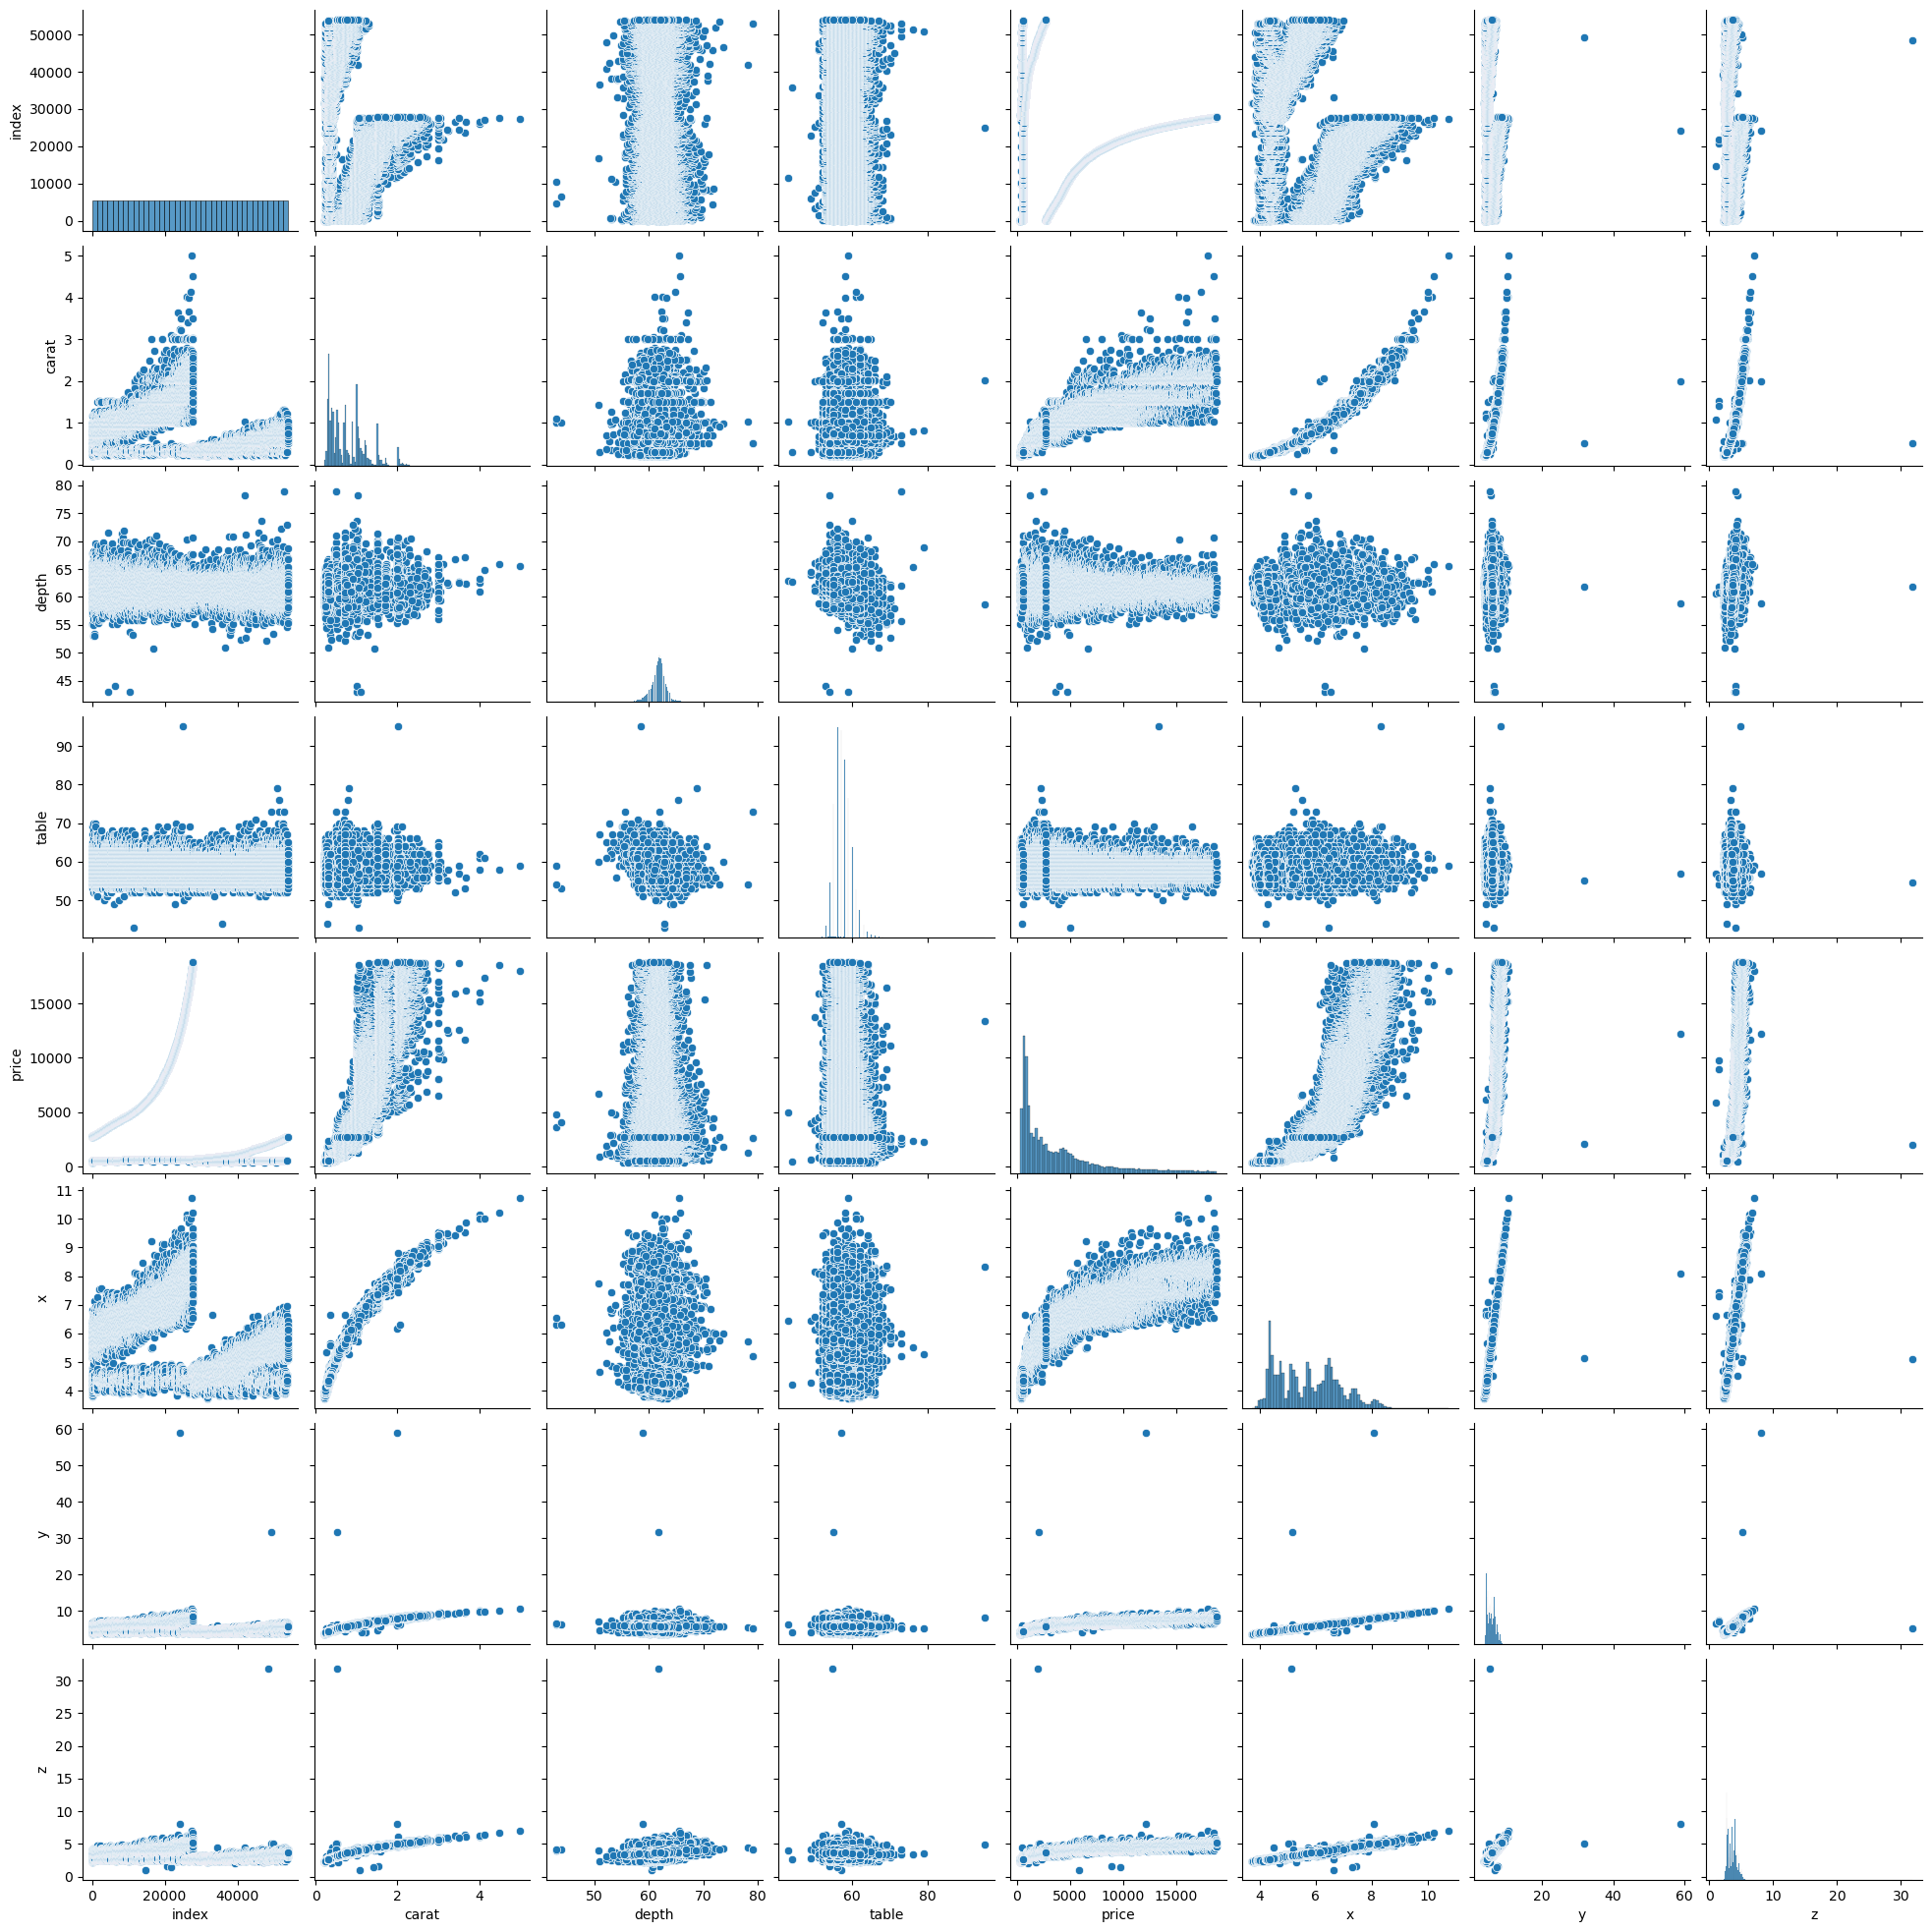

In [78]:
# Plotiing all possible plots simultaneously using pairplot
sns.pairplot(dataset)

In [79]:
# we can   see that there are 11 inputs here in this dataset
dataset.shape

(53920, 11)

In [80]:
# doing this allows us to know all the data type stored in our dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   price    53920 non-null  int64  
 8   x        53920 non-null  float64
 9   y        53920 non-null  float64
 10  z        53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


# Data Preprocessing 
#### This is the part where i had extreme challanges solving and researching it took me about a day to debug my issuesb ut finally bug is fixed and now time to learn and upgrade further.

In [ ]:
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)
dataset.shape

In [ ]:
''' in ths step we have colons variable and object_cls with
respect to it because we have diffrent types of data type and 
to have same datatype we do this and set it as object for
to differinciate the datatype'''

columns = (dataset.dtypes=='object')
object_cls = list(columns[columns].index)
print('Categorial variables:')
print(object_cls)

In [ ]:

''' OneHotEncoder and labelEnoder allows us to encode data from categorial variables
to integer values for smooting the data modeling process without Encoder 
your ML model will show lost of eroor and concince you to solve the
categorial variables in form of numerical value   (TRUST ME!! it took me a day to hande this issue...)'''

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_data = dataset.copy()
label_encoder= LabelEncoder()
for cls in object_cls:
    label_data[cls] = label_encoder.fit_transform(label_data[cls])
label_data.head()

In [ ]:
print ("AS of now you can see all my categorial values(cut,color,clarity)are replace byn Numerical Values:")

In [ ]:
from sklearn.model_selection import train_test_split


X = label_data.drop(["price"], axis=1)
y = label_data["price"]

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the training data into training and validation sets (60% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Build The Model

This part is extremly crutial step in machine learning use u design and build youy
model here i have used nerual network having three layers with 1024 nurons and relu (activation function)
Dense help connect the layers with one another in last line i have used dense(1) where the overall result get us one output, 
Dropout function (0.3)inroduce non linearity by 30% to reduce over-fitting.
This part is extremly crutial step in machine learning use u design and build your
model here i have used nerual network having three layers with 1024 nurons and relu (activation function).

In [ ]:
''' This part is extremly crutial step in machine learning use u design and build youy
model here i have used nerual network having three layers with 1024 nurons and relu (activation function)

'''
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=[10]),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [72]:
model.compile(
    optimizer='adam',# Adaptive movement Estimation
    loss='mae', # Mean Absolute Error
)

# Train The Model

In [73]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1024,
    epochs=10,
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 281ms/step - loss: 3643.6394 - val_loss: 3534.8079
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - loss: 3618.7888 - val_loss: 3564.4546
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - loss: 3593.1846 - val_loss: 3605.4885
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - loss: 3541.4819 - val_loss: 3462.1321
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - loss: 3499.2473 - val_loss: 3451.5703
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - loss: 3465.2061 - val_loss: 3363.6711
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - loss: 3396.9504 - val_loss: 3366.0129
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - loss: 3352.9663 - val_loss: 3275.0100
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - loss: 3304.5132 - val_loss: 3150.1462
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - loss: 3320.8618 - val_loss: 2979.4158


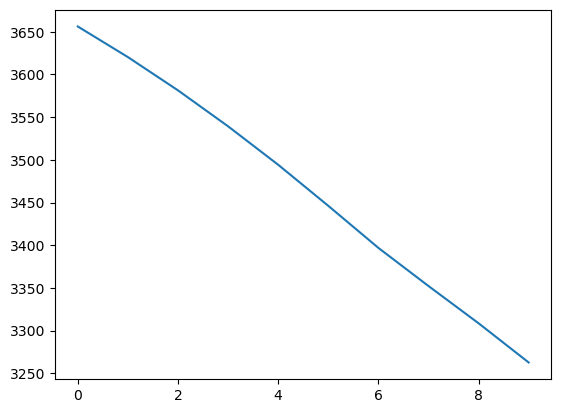

In [74]:
# covert the traning history to a dataframe
history_df = pd.DataFrame(history.history)
# use pandas native plot method
history_df['loss'].plot();

# Test The Model

In [75]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2943.0330
Test Loss: 2952.34814453125


In [76]:
import random

random.seed(42)

# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Predictions for the randomly selected rows
predictions = model.predict(X_test.iloc[random_indices])

for i in random_indices:
    print("Features (X):", X_test.iloc[i].values)
    print("Actual Label (y):", y_test.iloc[i])
    print("Predicted Label:", predictions[random_indices.index(i)][0])
    print("-------------------------------------------")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Features (X): [4.3775e+04 5.4000e-01 4.0000e+00 1.0000e+00 2.0000e+00 6.3200e+01
 5.7000e+01 5.1500e+00 5.2000e+00 3.2700e+00]
Actual Label (y): 1440
Predicted Label: 1321.3329
-------------------------------------------
Features (X): [1.986e+04 1.040e+00 2.000e+00 2.000e+00 5.000e+00 6.160e+01 5.600e+01
 6.530e+00 6.550e+00 4.030e+00]
Actual Label (y): 8415
Predicted Label: 1327.5973
-------------------------------------------
Features (X): [5.1316e+04 3.1000e-01 2.0000e+00 3.0000e+00 5.0000e+00 6.2400e+01
 5.5000e+01 4.3000e+00 4.3200e+00 2.6900e+00]
Actual Label (y): 544
Predicted Label: 1317.1233
-------------------------------------------
Features (X): [3.4238e+04 4.0000e-01 3.0000e+00 0.0000e+00 3.0000e+00 6.0400e+01
 5.9000e+01 4.8300e+00 4.8000e+00 2.9100e+00]
Actual Label (y): 855
Predicted Label: 1324.8217
-------------------------------------------
Features (X): [5.1755e+04 6.5000e-01 4.0000e+00 2.0000e+00 4.0000e+00 5.9300e+01
 5.6000e

In summary, my model seems to be learning and improving its performance on both the training and validation data over the 10 epochs. However, the absolute values of the losses are still quite high,so my model prediction is still not so accurate.  data might not give the accurate result result because it have just been trained epochs =10 times only. more i add value to epochs more accurate the model gets. 

In [ ]:
!pip show tensorflow

In [47]:
!pip show keras

Name: keras
Version: 3.2.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-intel
